In [1]:
# libraries  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("GSAF5.xls")

### Cleaning Data

- 1 - Copy the data (to be safe) 
- 2 - Fix the name of columns 



In [5]:
df2 = df.copy()

In [6]:
# we have 5 duplicate which should be taking care of
df2.duplicated().sum()

24

In [7]:
df2.columns= df2.columns.str.lower().str.replace(" ","_")

In [8]:
df2.drop(['unnamed:_21', 'unnamed:_22', 'unnamed:_11'], axis=1, inplace=True)# unmaned columns 
df2.drop(['age', 'species_', 'time'],  axis=1, inplace=True) # more than 3000 missing values 
df2.drop(['source','pdf', 'href_formula', 'href', 'case_number', 'case_number.1','original_order'],  axis=1, inplace=True ) #I find irrelevant 

In [9]:
df2['year'].isna().sum()

27

- 3 - Copy the data (to be safe)
- 4 - Missing values


In [10]:
df3 = df2.copy()
df3 = df3.dropna(how='all')
df3 = df3.dropna(subset=['year'])

In [11]:
df3['type'] = df3['type'].replace('?', 'Unconfirmed')
df3['type'] = df3['type'].replace(' Provoked', 'Provoked')
df3['type'] = df3['type'].fillna('Unconfirmed')

df3['country'] = df3['country'].str.upper()
df3['country'] = df3['country'].replace('', 'unknown')
df3['country'] = df3['country'].fillna('unknown')

df3['state'] = df3['state'].str.strip()
df3['state'] = df3['state'].str.lower()
df3['state'] = df3['state'].replace('', 'unknown')
df3['state'] = df3['state'].fillna('unknown')

df3['location'] = df3['location'].str.strip()
df3['location'] = df3['location'].replace('', 'unknown')
df3['location'] = df3['location'].fillna('unknown')

df3['name'] = df3['name'].replace('', 'unknown')
df3['name'] = df3['name'].replace('female', 'unknown')
df3['name'] = df3['name'].fillna('unknown')

df3['sex'] = df3['sex'].str.strip()
df3['sex'] = df3['sex'].str.lower()
df3['sex'] = df3['sex'].replace('', 'unknown')
df3['sex'] = df3['sex'].replace('f', 'female')
df3['sex'] = df3['sex'].replace('m', 'male')
df3['sex'] = df3['sex'].replace('n', 'unknown')
df3['sex'] = df3['sex'].replace('.', 'unknown')
df3['sex'] = df3['sex'].replace('m x 2', 'unknown')
df3['sex'] = df3['sex'].replace('lli', 'unknown')
df3['sex'] = df3['sex'].fillna('unknown')


In [12]:
df3['activity'].str.strip()

0           Swimming
1            Surfing
2           Swimming
3                NaN
4            Fishing
            ...     
6939          Diving
6940    Pearl diving
6941        Swimming
6942             NaN
6943        Swimming
Name: activity, Length: 6942, dtype: object

# ACTIVITIES

In [13]:
df3.loc[df3['activity'].str.contains('Swi', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Div', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Float', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Bath', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Swmm', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Div', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Float', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Snorkeling', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Standing', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Play', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Splashing', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Lifesaving', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Jumped', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Sitting', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Alacatraz', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('drowning', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Ran', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Rescuing', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('swam', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Scuba', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Underwater photography', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Lifeguard', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Squatting in the water', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Sittting in water', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Lying', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('waist-deep', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Kneeling', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('shallows', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('ride a shark', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('cage', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Crouching', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Crawling', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Leaving', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Stamding', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('Thrashing the water', case=False, na=False), 'activity'] = 'Swimming'
df3.loc[df3['activity'].str.contains('wife to beach', case=False, na=False), 'activity'] = 'Swimming'

In [14]:
df3.loc[df3['activity'].str.contains('Fis', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Fih', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Wad', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Catching', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Killing', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Net', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Treading', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Shoot', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('gather', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Hunt', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Towing', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Haras', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('angl', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('trawl', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Harp', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('spear', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Crab', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Lobstering', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Shrimping', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Scalloping', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('prawns', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('gut', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Oystering', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('pêcheur de bichiques', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('kill a shark', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('opihi', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('trap', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('hook', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('catch', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('meat', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Pulling', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('flounder', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('land a shark', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('lining', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Chumming', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Baiting', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Batin', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('line', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('beche-de-mer', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('specimens', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Holding', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Grabbing', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Measuring', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Bending', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('return injured shark', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('dragging', case=False, na=False), 'activity'] = 'Fishing'
df3.loc[df3['activity'].str.contains('Feeling the shark’s teeth', case=False, na=False), 'activity'] = 'Fishing'

In [15]:
df3.loc[df3['activity'].str.contains('board', case=False, na=False), 'activity'] = 'Board Sports'
df3.loc[df3['activity'].str.contains('ski', case=False, na=False), 'activity'] = 'Board Sports'
df3.loc[df3['activity'].str.contains('SUP', case=False, na=False), 'activity'] = 'Board Sports'
df3.loc[df3['activity'].str.contains('Padd', case=False, na=False), 'activity'] = 'Board Sports'
df3.loc[df3['activity'].str.contains('Surfing', case=False, na=False), 'activity'] = 'Board Sports'
df3.loc[df3['activity'].str.contains('Surfng', case=False, na=False), 'activity'] = 'Board Sports'
df3.loc[df3['activity'].str.contains('Kite', case=False, na=False), 'activity'] = 'Board Sports'
df3.loc[df3['activity'].str.contains('Kakaying', case=False, na=False), 'activity'] = 'Board Sports'

In [16]:
df3.loc[df3['activity'].str.contains('boat', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('ship', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Sea disaster', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Wreck', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('ferry', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('cruise', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('capsize', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('sank', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('collide', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('collision', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('yacht', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('craft', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Kayaking', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Canoe', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Rowing', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('sail', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Fell', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Sinking', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Sculling', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('freighter', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('sunk', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Navy', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Cruising', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Ocean racing', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('SS', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('anchor', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('schooner', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('raft', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('dinghy', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('expedition', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('junk', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Finning', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('S.S.', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('submarine', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('barque', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('steamer', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Knocked', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Watching', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('life preserver', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('HBM', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('tanker', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('ton', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('foundered', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('deck', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('motor', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('destroyer', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Trailing', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('bark', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('free the shark', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('hawser', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('life jackets', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('life jackets', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Adrift', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('hurricane', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('attract dolphins', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('disemboweled', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Picking up shark', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Cleaning a tank', case=False, na=False), 'activity'] = 'Boating'
df3.loc[df3['activity'].str.contains('Investigating shark sighting', case=False, na=False), 'activity'] = 'Boating'

In [17]:
df3.loc[df3['activity'].str.contains('air', case=False, na=False), 'activity'] = 'Aviation'
df3.loc[df3['activity'].str.contains('Plane', case=False, na=False), 'activity'] = 'Aviation'
df3.loc[df3['activity'].str.contains('Parachuted', case=False, na=False), 'activity'] = 'Aviation'
df3.loc[df3['activity'].str.contains('balloon', case=False, na=False), 'activity'] = 'Aviation'
df3.loc[df3['activity'].str.contains('Boeing', case=False, na=False), 'activity'] = 'Aviation'

In [18]:
df3.loc[df3['activity'].str.contains('Walking', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Murder', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Feeding', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Jumping', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Clamming', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Tagging', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Suicide', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Shark watching', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('No details', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('horse', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('automobile', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('nightclub', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('beached', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('sedated', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('research', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Meshing', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Filming', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('shells', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Washing', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('seeing', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Searching', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Swept out to sea', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Aquarium', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Petting', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('over cliff', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Teasing', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('shark tank', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('male', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('film', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('rescue', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Hilo', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Hiking', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('anesthetize', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('enter the USA', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Defecating', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('homicide', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('pig baskets', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Touching', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Touching', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('aid of child', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Photographing', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('captive shark', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('Dry shelling', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('drive shark from area', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('away from the beach', case=False, na=False), 'activity'] = 'Other'
df3.loc[df3['activity'].str.contains('chase shark out to sea', case=False, na=False), 'activity'] = 'Other'

In [19]:
df3['activity'] = df3['activity'].fillna('Unknown')
df3['activity'] = df3['activity'].str.strip().replace('', 'Unknown')
df3.loc[df3['activity'].str.contains('Unknown', case=False, na=False), 'activity'] = 'Unknown'
df3.loc[df3['activity'] == ".", 'activity'] = 'Unknown'

In [20]:
df3['activity'].value_counts()

Swimming        2611
Board Sports    1600
Fishing         1585
Unknown          594
Boating          426
Other            117
Aviation           9
Name: activity, dtype: int64

In [21]:
graph = {'Swimming':2611, 'Board Sports':1600, 'Fishing':1585, 'Unknown':594, 'Boating':426, 'Other':117, 'Aviation':9}
Activity_Type = list(graph.keys())
Num_of_Victims = list(graph.values())

Text(0.5, 0, 'Activity_Type')

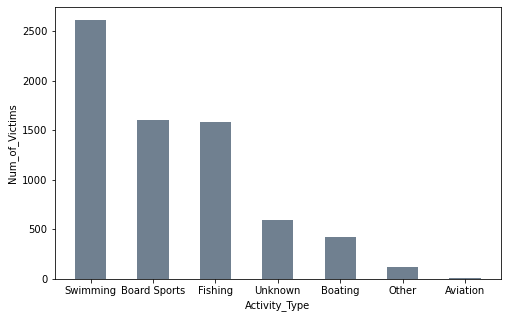

In [22]:
plt.figure(figsize=(8,5))
plt.bar(Activity_Type, Num_of_Victims, color = 'slategrey', width=0.5)
plt.ylabel('Num_of_Victims')
plt.xlabel('Activity_Type')

In [23]:
# i think this code is here by accident so it should be checked and removed


# df3.loc[df3['injury'].str.contains('No injury', case=False, na=False), 'injury'] = 'No injury'
# df3.loc[df3['injury'].str.contains('no injury', case=False, na=False), 'injury'] = 'No injury'
# df3.loc[df3['injury'].str.contains('no injurty', case=False, na=False), 'injury'] = 'No injury'
# df3.loc[df3['injury'].str.contains('inury', case=False, na=False), 'injury'] = 'No injury'

# df3.loc[df3['injury'].str.contains('not', case=False, na=False), 'injury'] = 'No Injury'

# df3.loc[df3['injury'].str.contains('Injuries', case=False, na=False), 'injury'] = 'Injury'
# df3.loc[df3['injury'].str.contains('Injury', case=False, na=False), 'injury'] = 'Injury'
# df3.loc[df3['injury'].str.contains('injured', case=False, na=False), 'injury'] = 'Injury'
# df3.loc[df3['injury'].str.contains('Recovered', case=False, na=False), 'injury'] = 'Injury recovered'

# df3.loc[df3['injury'].str.contains('Minor', case=False, na=False), 'injury'] = 'Minor injury'

# df3.loc[df3['injury'].str.contains('FATAL', case=False, na=False), 'injury'] = 'Fatal'
# df3.loc[df3['injury'].str.contains('Bit', case=False, na=False), 'injury'] = 'Bitten'
# df3.loc[df3['injury'].str.contains('Lac', case=False, na=False), 'injury'] = 'Laceration'
# df3.loc[df3['injury'].str.contains('Serious', case=False, na=False), 'injury'] = 'Serious'
# df3.loc[df3['injury'].str.contains('Severe', case=False, na=False), 'injury'] = 'Serious'
# df3.loc[df3['injury'].str.contains('Lost', case=False, na=False), 'injury'] = 'Serious'
# df3.loc[df3['injury'].str.contains('Cut', case=False, na=False), 'injury'] = 'Cuts'
# df3.loc[df3['injury'].str.contains('Punc', case=False, na=False), 'injury'] = 'Puncture'

# df3.loc[df3['injury'].str.contains('Superficial', case=False, na=False), 'injury'] = 'Superficial'
# df3.loc[df3['injury'].str.contains('board', case=False, na=False), 'injury'] = 'Material Damage'
# df3.loc[df3['injury'].str.contains('boat', case=False, na=False), 'injury'] = 'Material Damage'
# df3.loc[df3['injury'].str.contains('kay', case=False, na=False), 'injury'] = 'Material Damage'

# df3.loc[df3['injury'].str.contains('Disap', case=False, na=False), 'injury'] = 'Disappeared'

# df3.loc[df3['injury'].str.contains('Scratch', case=False, na=False), 'injury'] = 'Scratches'
# df3.loc[df3['injury'].str.contains('Bruise', case=False, na=False), 'injury'] = 'Bruising'
# df3.loc[df3['injury'].str.contains('Abrasion', case=False, na=False), 'injury'] = 'Abrasion'
# df3.loc[df3['injury'].str.contains('Wound', case=False, na=False), 'injury'] = 'Wound'
# df3.loc[df3['injury'].str.contains('Amputate', case=False, na=False), 'injury'] = 'Amputation'
# df3.loc[df3['injury'].str.contains('Lost', case=False, na=False), 'injury'] = 'Amputation'  
# df3.loc[df3['injury'].str.contains('Drowning', case=False, na=False), 'injury'] = 'Drowning'
# df3.loc[df3['injury'].str.contains('Scavenging', case=False, na=False), 'injury'] = 'Scavenged'
# df3.loc[df3['injury'].str.contains('Hoax', case=False, na=False), 'injury'] = 'Hoax'
# df3.loc[df3['injury'].str.contains('unknown', case=False, na=False), 'injury'] = 'unknown'
# df3.loc[df3['injury'].str.contains('missing', case=False, na=False), 'injury'] = 'Missing'
# df3.loc[df3['injury'].str.contains('incident', case=False, na=False), 'injury'] = 'Incident'
# df3.loc[df3['injury'].str.contains('report', case=False, na=False), 'injury'] = 'Incident'

# df3['injury'] = df3['injury'].replace('', 'unknown')
# df3['injury'] = df3['injury'].fillna('unknown')


# LOCATION

In [24]:
df.isna().sum()

Date                25
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age               3019
Injury              60
Unnamed: 11        587
Time              3551
Species           3157
Source              44
pdf                170
href formula       150
href               173
Case Number        171
Case Number.1      172
original order     170
Unnamed: 21       6968
Unnamed: 22       6967
dtype: int64

In [25]:
df3.isna().sum()

date         0
year         0
type         0
country      0
state        0
location     0
activity     0
name         0
sex          0
injury      35
dtype: int64

In [26]:
df3.head()

,date,year,type,country,state,location,activity,name,sex,injury
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,queensland,Bargara Beach,Swimming,Brooklyn Sauer,female,"Minor injuries to back, abdomen and legs"
1,04 Mar 2024,2024.0,Unprovoked,USA,hawaii,"Old Man's, Waikiki",Board Sports,Matthew White,male,"No injury, shark bit surfboard"
2,02 Mar-2024,2024.0,Unprovoked,USA,hawaii,"Rainbows, Oahu",Swimming,unknown,female,Lacerations to left foot
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,western australia,"Sandlnd Island, Jurian Bay",Unknown,unknown,female,Leg bitten
4,14 Feb-2024,2024.0,Unprovoked,INDIA,maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,male,Calf of lower left leg injured


In [27]:
###Countries + Region Mapping

In [28]:

country1 = [
    df3['country'].str.contains('USA|TRINIDAD AND TOBAGO|BAHAMAS|MEXICO|BELIZE|TURKS AND CAICOS|CUBA|JAMAICA|COSTA RICA|CANADA|ST KITTS NEVIS|ST MARTIN|DOMINICAN REPUBLIC|CAYMAN ISLANDS|ARUBA|PUERTO RICO|ST. MARTIN|ANTIGUA|PANAMA|NEVIS|BRITISH VIRGIN ISLANDS|ST. MAARTIN|GRAND CAYMAN|HONDURAS|CARIBBEAN SEA|EL SALVADOR|BERMUDA|NORTH ATLANTIC OCEAN|GRENADA|NORTH PACIFIC OCEAN|BRITISH WEST INDIES|NICARAGUA|MARTINIQUE|GUATEMALA|NETHERLANDS ANTILLES|MID-PACIFIC OCEAN|CURACAO|BARBADOS|HAITI|SAN DOMINGO|WEST INDIES|TOBAGO|GREENLAND|ROATAN', case=False, na=False),  
    df3['country'].str.contains('COLOMBIA|ECUADOR|BRAZIL|ARGENTINA|CHILE|VENEZUELA|URUGUAY|SOUTH PACIFIC OCEAN|SOUTH ATLANTIC OCEAN|GUYANA|FALKLAND ISLANDS|PARAGUAY|PERU', case=False, na=False),
    df3['country'].str.contains('SPAIN|PORTUGAL|ENGLAND|IRELAND|ITALY|UNITED KINGDOM|GREECE|FRANCE|SCOTLAND|CROATIA|RUSSIA|AZORES|MALTA|NORWAY|MONTENEGRO|BRITISH ISLES|NORTH SEA|THE BALKANS|SLOVENIA|ICELAND|ITALY / CROATIA|MONACO|CRETE|CYPRUS|GEORGIA|MEDITERRANEAN SEA|SWEDEN', case=False, na=False), 
    df3['country'].str.contains('SOUTH AFRICA|EGYPT|SEYCHELLES|REUNION ISLAND|LIBYA|MAURITIUS|ST HELENA|COMOROS|REUNION|CAPE VERDE|MOZAMBIQUE|NIGERIA|KENYA|MADAGASCAR|SOMALIA|SENEGAL|SIERRA LEONE|LIBERIA|TANZANIA|ANGOLA|TUNISIA|NAMIBIA|SUDAN|RED SEA|RED SEA / INDIAN OCEAN|GABON|MAYOTTE|EGYPT|INDIAN OCEAN|GUINEA|EQUATORIAL GUINEA|ALGERIA|COAST OF AFRICA|GHANA|DJIBOUTI', case=False, na=False),  
    df3['country'].str.contains('AUSTRALIA|NEW ZEALAND|CORAL SEA|SAMOA|FRENCH POLYNESIA|NEW CALEDONIA|FIJI|PAPUA NEW GUINEA|SOLOMON ISLANDS|KIRIBATI|GUAM|TONGA|VANUATU|MICRONESIA|MARSHALL ISLANDS|PALAU|WESTERN SAMOA|NEW BRITAIN|JOHNSTON ISLAND|NEW GUINEA|FEDERATED STATES OF MICRONESIA|ADMIRALTY ISLANDS|AMERICAN SAMOA|NORTHERN MARIANA ISLANDS|SOLOMON ISLANDS|SOUTHWEST PACIFIC OCEAN|BRITISH NEW GUINEA|TUVALU|COOK ISLANDS|TASMAN SEA', case=False, na=False),    
    df3['country'].str.contains('INDIA|PHILIPPINES|MALDIVES|JAPAN|INDONESIA|THAILAND|JORDAN|ISRAEL|CHINA|MALAYSIA|UNITED ARAB EMIRATES|DIEGO GARCIA|TAIWAN|PALESTINIAN TERRITORIES|SAUDI ARABIA|SOUTH KOREA|VIETNAM|SRI LANKA|OKINAWA|EGYPT / ISRAEL|NORTHERN ARABIAN SEA|HONG KONG|IRAN|SOUTH CHINA SEA|BANGLADESH|IRAQ|TURKEY|SINGAPORE|PERSIAN GULF|PACIFIC OCEAN|MALDIVE ISLANDS|ANDAMAN / NICOBAR ISLANDS|INDIAN OCEAN|IRAN / IRAQ|JAVA|BAY OF BENGAL|KUWAIT|YEMEN|BURMA|LEBANON|CEYLON|SYRIA|ANDAMAN ISLANDS|BAHRAIN|KOREA|CEYLON (SRI LANKA)', case=False, na=False),

]

continent1 = [
    'North America',
    'South America',
    'Europe',
    'Africa',
    'Oceania',
    'Asia'
]


In [29]:
df3['Continent'] = np.select(country1, continent1, default='Others')

In [30]:
df3['Continent'].value_counts()

North America    3032
Oceania          1922
Africa           1031
Asia              404
Europe            274
South America     181
Others             98
Name: Continent, dtype: int64

In [31]:
country2 = [
    df3['country'].str.contains('GREENLAND', case=False, na=False),
    df3['country'].str.contains('SOLOMON ISLANDS / VANUATU|SOUTHWEST PACIFIC OCEAN', case=False, na=False),
    df3['country'].str.contains('TRINIDAD|BAHAMAS|TURKS AND CAICOS|CUBA|JAMAICA|ST KITTS / NEVIS|ST MARTIN|DOMINICAN REPUBLIC|CAYMAN ISLANDS|ARUBA|PUERTO RICO|ST. MARTIN|TRINIDAD & TOBAGO|ANTIGUA|TURKS & CAICOS|NEVIS|BRITISH VIRGIN ISLANDS|ST. MAARTIN|GRAND CAYMAN|CARIBBEAN SEA|GRENADA|BRITISH WEST INDIES|MARTINIQUE|NETHERLANDS ANTILLES|CURACAO|BARBADOS|HAITI|SAN DOMINGO|WEST INDIES|TOBAGO|ROATAN', case=False, na=False),
    df3['country'].str.contains('GEORGIA', case=False, na=False),
    df3['country'].str.contains('GABON|EQUATORIAL GUINEA / CAMEROON', case=False, na=False),
    df3['country'].str.contains('MEXICO|BELIZE|COSTA RICA|PANAMA|MEXICO |HONDURAS|EL SALVADOR|NICARAGUA |GUATEMALA|NICARAGUA', case=False, na=False),
    df3['country'].str.contains('SLOVENIA', case=False, na=False),
    df3['country'].str.contains('PARAGUAY', case=False, na=False),
    df3['country'].str.contains('COAST OF AFRICA', case=False, na=False),
    df3['country'].str.contains('KENYA|SOMALIA|TANZANIA|DJIBOUTI', case=False, na=False),
    df3['country'].str.contains('JAPAN|CHINA|TAIWAN|SOUTH KOREA|OKINAWA|HONG KONG|SOUTH CHINA SEA|KOREA', case=False, na=False),
    df3['country'].str.contains('RUSSIA', case=False, na=False),
    df3['country'].str.contains('CYPRUS', case=False, na=False),
    df3['country'].str.contains('BRAZIL', case=False, na=False),
    df3['country'].str.contains('JORDAN|ISRAEL|UNITED ARAB EMIRATES|PALESTINIAN TERRITORIES|SAUDI ARABIA|UNITED ARAB EMIRATES (UAE)|EGYPT / ISRAEL|IRAN|IRAQ|IRAN / IRAQ|KUWAIT|YEMEN |LEBANON|SYRIA|BAHREIN', case=False, na=False),
    df3['country'].str.contains('EGYPT|LIBYA|TUNISIA|SUDAN|SUDAN?|EGYPT |ALGERIA|IRAN|IRAQ|IRAN / IRAQ|KUWAIT|YEMEN |LEBANON|SYRIA|BAHREIN', case=False, na=False),
    df3['country'].str.contains('USA', case=False, na=False),
    df3['country'].str.contains('ENGLAND|IRELAND|UNITED KINGDOM|SCOTLAND|NORWAY|ICELAND|SWEDEN', case=False, na=False),
    df3['country'].str.contains('CANADA', case=False, na=False),
    df3['country'].str.contains('COLOMBIA|COLUMBIA|VENEZUELA|GUYANA', case=False, na=False),
    df3['country'].str.contains('BRITISH ISLES', case=False, na=False),
    df3['country'].str.contains('ECUADOR', case=False, na=False),
    df3['country'].str.contains('SEYCHELLES|REUNION ISLAND|MAURITIUS|COMOROS|REUNION|DIEGO GARCIA|AZORES|MADAGASCAR|NORTHERN ARABIAN SEA|BERMUDA|NORTH ATLANTIC OCEAN|PACIFIC OCEAN |SOUTH PACIFIC OCEAN|RED SEA|NORTH PACIFIC OCEAN|SOUTH ATLANTIC OCEAN|PERSIAN GULF|RED SEA / INDIAN OCEAN|PACIFIC OCEAN|NORTH SEA|MAYOTTE|NORTH ATLANTIC OCEAN |INDIAN OCEAN|MID-PACIFC OCEAN|OCEAN|INDIAN OCEAN?|TASMAN SEA|MEDITERRANEAN SEA', case=False, na=False),
    df3['country'].str.contains('AUSTRALIA|NEW ZEALAND|SAMOA|FRENCH POLYNESIA|NEW CALEDONIA|FIJI|PAPUA NEW GUINEA|SOLOMON ISLANDS|KIRIBATI|GUAM|TONGA|VANUATU| TONGA|MICRONESIA|MARSHALL ISLANDS|PALAU|WESTERN SAMOA|NEW BRITAIN|JOHNSTON ISLAND|NEW GUINEA|FEDERATED STATES OF MICRONESIA|ADMIRALTY ISLANDS|AMERICAN SAMOA|NORTHERN MARIANA ISLANDS|BRITISH NEW GUINEA|TUVALU|COOK ISLANDS', case=False, na=False),
    df3['country'].str.contains('INDIA|MALDIVES|SRI LANKA|BANGLADESH|MALDIVE ISLANDS|BAY OF BENGAL|CEYLON|CEYLON (SRI LANKA)', case=False, na=False),
    df3['country'].str.contains('FALKLAND ISLANDS', case=False, na=False),
    df3['country'].str.contains('PHILIPPINES|INDONESIA|THAILAND|MALAYSIA|VIETNAM|SINGAPORE|ANDAMAN / NICOBAR ISLANDAS|JAVA| PHILIPPINES|BURMA|ANDAMAN ISLANDS', case=False, na=False),
    df3['country'].str.contains('MONTENEGRO|THE BALKANS', case=False, na=False),    
    df3['country'].str.contains('SOUTH AFRICA|MOZAMBIQUE|ANGOLA|NAMIBIA', case=False, na=False),
    df3['country'].str.contains('SPAIN|PORTUGAL|ITALY|GREECE|CROATIA|ITALY / CROATIA|CRETE', case=False, na=False),
    df3['country'].str.contains('ARGENTINA|URUGUAY', case=False, na=False),
    df3['country'].str.contains('CAPE VERDE|NIGERIA|SENEGAL|Sierra Leone|LIBERIA|GUINEA|GHANA', case=False, na=False),
    df3['country'].str.contains('TURKEY', case=False, na=False),
    df3['country'].str.contains('FRANCE|MONACO', case=False, na=False),
    df3['country'].str.contains('CHILE|PERU', case=False, na=False),
    
]

region1 = [
    'Arctic',           
    'Australia',        
    'Caribbean',        
    'Caucasus',         
    'Central Africa',   
    'Central America',  
    'Central Europe',   
    'Central South America',  
    'Coast of Africa',  
    'East Africa',      
    'East Asia',        
    'Eastern Europe',   
    'Eastern Mediterranean',
    'Eastern South America',     
    'Middle East',      
    'North Africa',     
    'USA',     
    'Northern Europe',  
    'Northern North America',    
    'Northern South America',    
    'Northwestern Europe',  
    'Northwestern South America',    
    'Ocean',            
    'Australia',          
    'South Asia',       
    'South Atlantic',     
    'Southeast Asia',   
    'Southeast Europe', 
    'Southern Africa',  
    'Southern Europe',  
    'Southern South America',    
    'West Africa',      
    'Western Asia',     
    'Western Europe',   
    'Western South America'  
]

In [32]:
df3['Region'] = np.select(country2, region1, default='Others')

In [33]:
df3['Region'].value_counts()

USA                           2538
Australia                     2067
Southern Africa                647
Caribbean                      278
Ocean                          206
Southern Europe                184
Central America                179
Southeast Asia                 133
Eastern South America          122
East Asia                       94
Middle East                     75
South Asia                      67
North Africa                    66
Others                          66
Northern Europe                 50
West Africa                     34
Northern South America          26
East Africa                     25
Western Europe                  14
Northern North America          14
Western Asia                    12
Northwestern South America      11
Western South America           10
Southern South America           6
Eastern Europe                   4
Southeast Europe                 4
Central Africa                   2
Northwestern Europe              1
Central Europe      

###BAR GRAPH

Text(0.5, 1.0, 'World Wide Level - Shark Attacks')

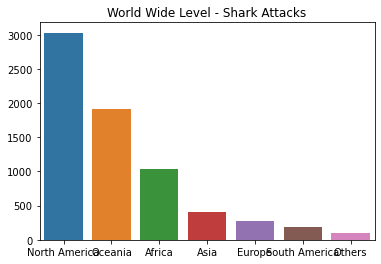

In [34]:
categories = ['North America', 'Oceania', 'Africa', 'Asia','Europe','South America','Others']
values = [3032,1922,1031,404,274,181,98]

sns.barplot(x=categories, y=values)
plt.title("World Wide Level - Shark Attacks")

Text(0.5, 1.0, 'Regional Level - Shark Attacks')

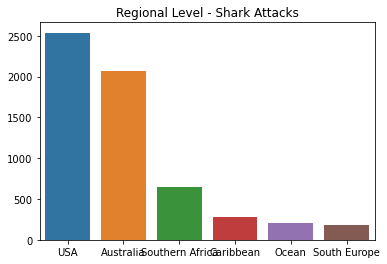

In [35]:
categories = ['USA', 'Australia', 'Southern Africa', 'Caribbean','Ocean','South Europe']
values = [2538,2067,647,278,206,184]

sns.barplot(x=categories, y=values)
plt.title("Regional Level - Shark Attacks")

# INJURY

In [36]:
df4 = df3.copy()

In [37]:
# we have 7 duplicate which should be taking care of...
df4.duplicated().sum()

5

In [38]:
print(df4.injury.dtype)

object


In [39]:
df4['injury'].str.strip()

0                Minor injuries to back, abdomen and legs
1                          No injury, shark bit surfboard
2                                Lacerations to left foot
3                                              Leg bitten
4                          Calf of lower left leg injured
                              ...                        
6939                                                FATAL
6940                                                FATAL
6941                                                FATAL
6942                                                FATAL
6943    FATAL. "Shark bit him in half, carrying away t...
Name: injury, Length: 6942, dtype: object

In [40]:
df3.injury.unique()

array(['Minor injuries to back, abdomen and legs',
       'No injury, shark bit surfboard', 'Lacerations to left foot', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [41]:
# The number of Injury in each types
df4.value_counts('injury').head(50)

injury
FATAL                             862
Foot bitten                       100
Survived                           97
No injury                          85
Leg bitten                         81
Left foot bitten                   53
No details                         43
Right foot bitten                  41
No injury, board bitten            35
Hand bitten                        33
Thigh bitten                       27
Calf bitten                        26
Lacerations to foot                26
Minor injury                       25
Right leg bitten                   25
Arm bitten                         25
FATAL, body not recovered          24
Lacerations to left foot           23
Foot lacerated                     21
Ankle bitten                       20
Lacerations to right foot          20
Minor injuries                     18
Right calf bitten                  17
Leg injured                        17
No injury, surfboard bitten        16
Lacerations to leg                 15
Left 

In [42]:
# Major injury types
injuries_list=["Fatal","Lacerations","Bitten","Punctures","Cuts","Drowning","Amputated","Severe Injury","No Injury","Injury","Material Damage"]

In [43]:
# grouping based on the injury type
grouping = df4.groupby(['injury'])
grouping.get_group('Survived')

,date,year,type,country,state,location,activity,name,sex,injury,Continent,Region
2017,Feb-2007,2007.0,Unprovoked,NEW CALEDONIA,loyalty islands,Ouvéa,Fishing,male,male,Survived,Oceania,Australia
2398,21-Apr-2003,2003.0,Unprovoked,USA,florida,"Shepard Park, Cocoa Beach, Brevard County",Board Sports,male,male,Survived,North America,USA
2544,26-Jul-2001,2001.0,Unprovoked,USA,south carolina,"Myrtle Beach, Horry County",Unknown,unknown,female,Survived,North America,USA
2558,29-May-2001,2001.0,Unprovoked,USA,texas,Galveston Island,Unknown,male,male,Survived,North America,USA
2684,02-Mar-2000,2000.0,Unprovoked,AUSTRALIA,new south wales,"Taronga Wharf, Athol Bay, Sydney Harbor",Swimming,Jack Dasey,male,Survived,Oceania,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...
6631,Reported 21-Jun-1856,1856.0,Unprovoked,ENGLAND,isle of wight,Colwell Bay,Swimming,male,male,Survived,Europe,Northern Europe
6708,Ca. 1839,1839.0,Unprovoked,FIJI,viti levu island,Rewa,Unknown,"Joeli Bulu, missionary",male,Survived,Oceania,Australia
6758,12-Jan-1807,1807.0,Unprovoked,AUSTRALIA,new south wales,"Cockle Bay, Sydney Harbour",Unknown,male,male,Survived,Oceania,Australia
6860,No date,0.0,Unprovoked,REUNION,grand'anse,Petite-île,Boating,unknown,male,Survived,Africa,Ocean


In [44]:
# Filtering the data set by Gender and type of Injury
filt = df4['injury'] == 'Fatal'
df3.loc[filt]['sex'].value_counts()

male      4
female    1
Name: sex, dtype: int64

In [45]:
graph = {'Injury':1709, 'Fatal':1479, 'Bitten':1370, 'Lacerations':907, 'Punctures':199}
Injury_Type = list(graph.keys())
Num_of_Victms = list(graph.values())

Text(0.5, 0, 'Injury_Type')

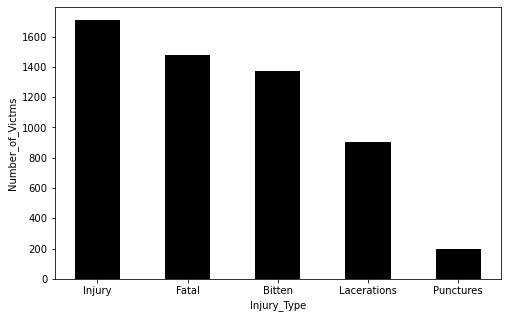

In [46]:
plt.figure(figsize=(8,5))
plt.bar(Injury_Type, Num_of_Victms, color = 'black', width=0.5)
plt.ylabel('Number_of_Victms')
plt.xlabel('Injury_Type')